In [518]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import kaggle

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

pd.set_option('display.max_columns', 30)
plt.rcParams['figure.figsize'] = (10, 6)

# Instructions 

Exploratory analysis and essay

Pre-work

Visit the following website and explore the range of sizes of this dataset (from 100 to 5 million records):
https://excelbianalytics.com/wp/downloads-18-sample-csv-files-data-sets-for-testing-sales/ or
(new) https://www.kaggle.com/datasets

1. Select 2 files to download

2. Based on your computer's capabilities (memory, CPU), select 2 files you can handle (recommended one small, one large)

3. Download the files

4. Review the structure and content of the tables, and think about the data sets (structure, size, dependencies, labels, etc)

5. Consider the similarities and differences in the two data sets you have downloaded

6. Think about how to analyze and predict an outcome based on the datasets available

7. Based on the data you have, think which two machine learning algorithms presented so far could be used to analyze the data



Answer questions such as:

1. Are the columns of your data correlated?
2. Are there labels in your data? Did that impact your choice of algorithm?

3. What are the pros and cons of each algorithm you selected?

4. How your choice of algorithm relates to the datasets (was your choice of algorithm impacted by the datasets you chose)?

5. Which result will you trust if you need to make a business decision?

6. Do you think an analysis could be prone to errors when using too much data, or when using the least amount possible?

7. How does the analysis between data sets compare?


Develop your exploratory analysis of the data and the essay in the following 2 weeks.

# Essay 

500 words minimum

For this task 

# EA FC 24 Players Data

In [519]:
kaggle.api.authenticate()
kaggle.api.dataset_download_files('lucas142129silva/fifa-23-ultimate-team-players-database', path='./', unzip=True)

## Exploratory Data Analysis / Data Wrangling

In [520]:
df = pd.read_csv('eafc24_players_2024-03-08.csv')
df

,Name,Club,Nation,League,Rating,Main_Position,Alternate_Positions,Card_Version,Run_Style,Price,Price_Variation,Skills_Star,Weak_Foot_Star,Attack_Workrate,Defense_Workrate,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defense / Speed,Physical / Positioning,Height,BodyType,Popularity,Base_Stats,Ingame_Stats,Gender
0,Erling Haaland,Manchester City,Norway,Premier League,97,ST,CF,TOTY,Controlled Lengthy,12480000.0,0.67%,4,5,H,M,96.0,98,80,91,56,97,"195cm | 6'5""",Unique (94kg),1541,518,2481,Male
1,Kylian Mbappé,Paris SG,France,Ligue 1 Uber Eats,97,ST,"CF,LW",TOTY,Controlled Explosive,0.0,0,5,4,H,L,99.0,96,88,97,47,88,"182cm | 6'0""",Unique (75kg),1549,515,2465,Male
2,Lionel Messi,Inter Miami CF,Argentina,MLS,97,CF,"CAM,RW,ST",TOTY,Mostly Explosive,11580000.0,7.72%,5,4,M,L,91.0,96,97,98,40,77,"169cm | 5'7""",Messi (67kg),-4705,499,2430,Male
3,Pelé,EA FC ICONS,Brazil,Icons,96,ST,"CAM,CF",Winter Wildcard ICON,Mostly Explosive,6050000.0,0.92%,5,4,H,M,94.0,95,90,95,59,80,"173cm | 5'8""",Unique (70kg),982,513,2497,Male
4,Kevin De Bruyne,Manchester City,Belgium,Premier League,96,CM,CAM,TOTY,Controlled,3500000.0,4.63%,4,5,H,M,85.0,93,98,92,80,84,"181cm | 5'11""",Unique (75kg),1306,532,2558,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21374,Lucie Bendová,Slavia Praha,Czech Republic,Ceska Liga Žen,52,CB,CDM,normal,Controlled,0.0,200,2,3,M,M,58.0,25,40,45,52,55,"167cm | 5'6""",Short & Normal (60kg),643,275,1260,Female
21375,Aleigh Gambone,Glasgow City FC,United States,Scottish Women's League,52,CM,0,normal,Controlled,200.0,0,4,4,H,M,60.0,55,53,56,49,52,"170cm | 5'7""",Short & Lean (60kg),-1,325,1580,Female
21376,Joy Lysser,FC Zürich,Switzerland,Schweizer Damen Liga,52,CM,0,normal,Controlled,200.0,0,2,3,M,M,61.0,52,46,54,53,59,"170cm | 5'7""",Short & Lean (62kg),6,325,1487,Female
21377,Luisa Sury,FC Zürich,Switzerland,Schweizer Damen Liga,52,RB,"RWB,CB",normal,Controlled,0.0,200,2,3,L,M,58.0,44,47,53,47,56,"167cm | 5'6""",Short & Stocky (72kg),1,305,1421,Female


In [521]:
def show_summary(df) :
    
    print(80 * "+")
    print(f"DIMENSIONS : ({df.shape[0]}, {df.shape[1]})")
    
    print(80 * "+")
    print("COLUMNS: ")
    print(df.columns.values)
    
    print(80 * "+")
    print("DATA INFO: ")
    print(df.dtypes)
    
    print(80 * "+")
    print("MISSING VALUES:")
    print(df.isnull().sum())
    
    print(80 * "+")
    print("NUMBER OF UNIQUE VALUES:")
    print(df.nunique())

In [522]:
show_summary(df)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
DIMENSIONS : (21379, 27)
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
COLUMNS: 
['Name' 'Club' 'Nation' 'League' 'Rating' 'Main_Position'
 'Alternate_Positions' 'Card_Version' 'Run_Style' 'Price'
 'Price_Variation' 'Skills_Star' 'Weak_Foot_Star' 'Attack_Workrate'
 'Defense_Workrate' 'Pace / Diving' 'Shooting / Handling'
 'Passing / Kicking' 'Dribbling / Reflexes' 'Defense / Speed'
 'Physical / Positioning' 'Height' 'BodyType' 'Popularity' 'Base_Stats'
 'Ingame_Stats' 'Gender']
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
DATA INFO: 
Name                       object
Club                       object
Nation                     object
League                     object
Rating                      int64
Main_Position              object
Alternate_Positions        object
Card_Version               object
Run_Style                  object
Pr

### Distribution of Player Statistics

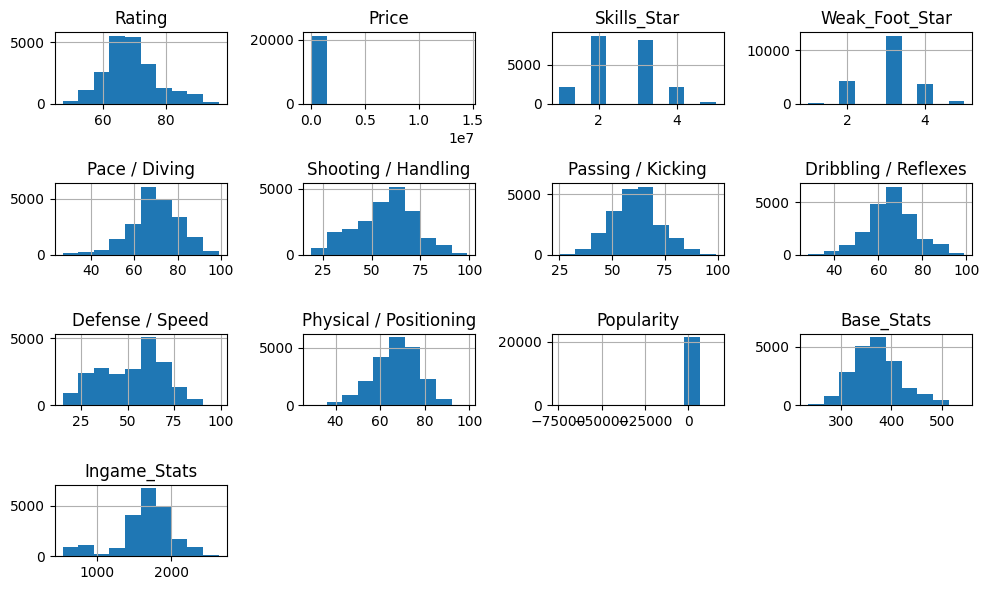

In [523]:
df.hist()
plt.tight_layout()
plt.show()

`Price` and `Popularity` are exhibiting degenerate distributions consider removing features from data.

In [524]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,21379.0,68.462229,8.464882,47.0,63.0,68.0,73.0,97.0
Price,21379.0,28156.780018,334604.888770,0.0,0.0,0.0,300.0,14500000.0
Skills_Star,21379.0,2.507882,0.844031,1.0,2.0,2.0,3.0,5.0
Weak_Foot_Star,21379.0,3.005052,0.708312,1.0,3.0,3.0,3.0,5.0
Pace / Diving,21379.0,69.693905,11.266075,27.0,63.0,70.0,77.0,99.0
Shooting / Handling,21379.0,56.657748,15.015127,19.0,47.0,58.0,67.0,99.0
Passing / Kicking,21379.0,60.846157,11.062447,25.0,54.0,61.0,68.0,99.0
Dribbling / Reflexes,21379.0,65.873193,10.535008,28.0,60.0,66.0,72.0,99.0
Defense / Speed,21379.0,52.211703,16.973134,15.0,38.0,55.0,65.0,99.0
Physical / Positioning,21379.0,66.679031,10.060156,29.0,60.0,67.0,74.0,99.0


In [525]:
# filter df 
filtered_df = df.query('Club != "HERO" & Card_Version == "normal" & Gender == "Male"')

In [526]:
#| warning : false

# removes price columns 
filtered_df.drop(['Price', 'Price_Variation', 'Gender'], axis=1, inplace=True)

C:\Users\nickc\AppData\Local\Temp\ipykernel_50168\760742216.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop(['Price', 'Price_Variation', 'Gender'], axis=1, inplace=True)


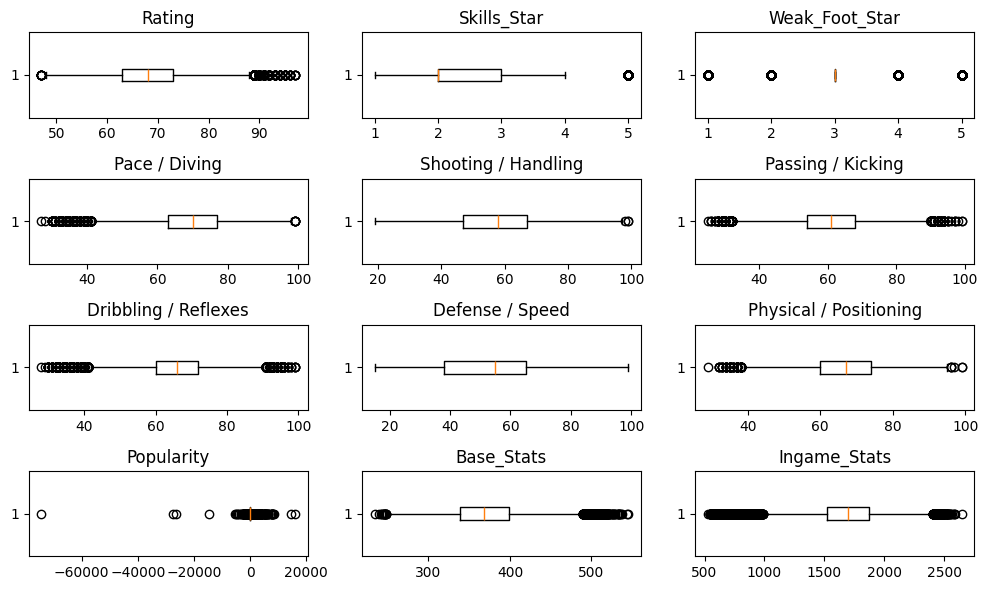

In [527]:
fig, axes = plt.subplots(nrows=4, ncols=3)
for i, col in enumerate(numeric_columns):
    row = i // 3
    col_idx = i % 3
    axes[row, col_idx].boxplot(df[col], vert=False)
    axes[row, col_idx].set_title(col)

plt.tight_layout()
plt.show()

### Who are top 10 rated players in World?

In [528]:
filtered_df.sort_values('Rating', ascending=False)[['Name','Club', 'Main_Position', 'Rating']].head(10)

,Name,Club,Main_Position,Rating
93,Erling Haaland,Manchester City,ST,91
95,Kevin De Bruyne,Manchester City,CM,91
94,Kylian Mbappé,Paris SG,ST,91
156,Lionel Messi,Inter Miami CF,CF,90
157,Karim Benzema,Al Ittihad,CF,90
158,Thibaut Courtois,Real Madrid,GK,90
159,Harry Kane,FC Bayern München,ST,90
160,Robert Lewandowski,FC Barcelona,ST,90
253,Neymar Jr,Al Hilal,LW,89
256,Casemiro,Manchester Utd,CDM,89


### How many are players are in each position? 

In [529]:
position_counts.sort_values(ascending=False)

Main_Position
CB     3128
ST     2407
CM     2165
GK     1928
CDM    1454
RB     1094
LB     1075
CAM     970
LM      942
RM      928
RW      438
LW      392
RWB     315
LWB     284
CF      135
Name: count, dtype: int64

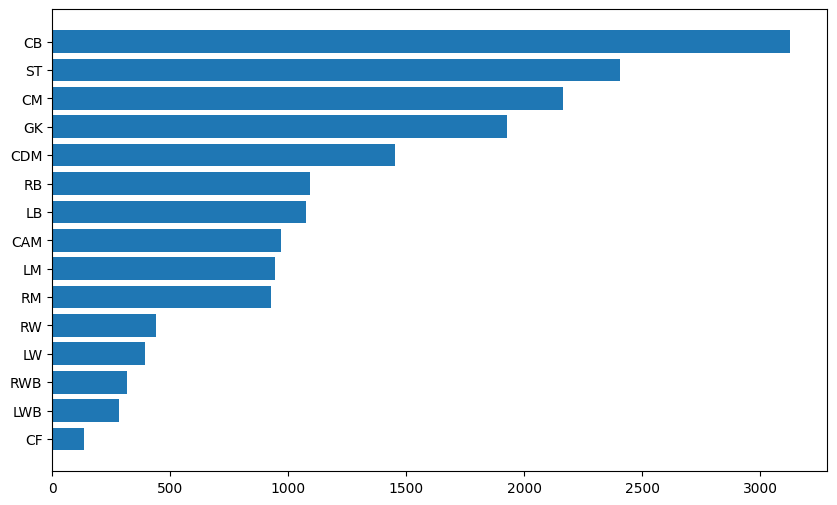

In [530]:
position_counts = filtered_df.groupby('Main_Position')['Main_Position'].value_counts().sort_values(ascending=True)
positions = position_counts.index.get_level_values(0).to_list()
counts = position_counts.values

plt.barh(positions, counts) 
plt.show()

### Which nation have the most players?

In [531]:
filtered_df.groupby('Main_Position')['Rating'].mean().sort_values(ascending=False)

Main_Position
CF     70.918519
LW     67.594388
CDM    67.108666
CB     66.704604
RW     66.557078
LM     66.481953
ST     66.406730
RM     66.355603
CAM    66.330928
RB     66.276965
CM     66.203233
LB     66.110698
LWB    65.285211
RWB    65.104762
GK     64.821058
Name: Rating, dtype: float64

In [532]:
filtered_df.groupby('Nation')['Nation'].value_counts().sort_values(ascending=False)

Nation
England        1700
Germany        1191
Argentina       998
Spain           957
France          877
               ... 
Thailand          1
South Sudan       1
Sri Lanka         1
Chad              1
Jordan            1
Name: count, Length: 157, dtype: int64

### Overall Correlation Matrix

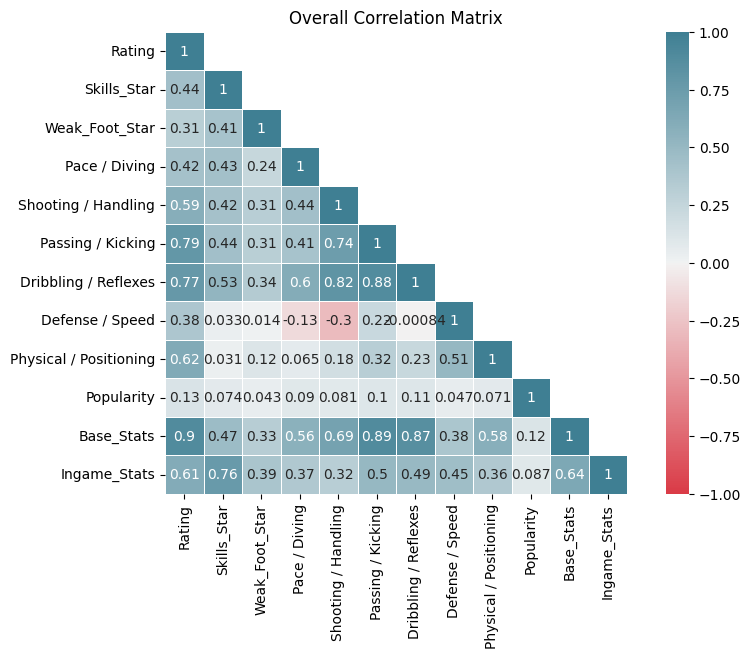

In [533]:
corr_matrix = df[numeric_columns].corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool)).copy()  

np.fill_diagonal(mask, False) 

cmap = sns.diverging_palette(220, 10, as_cmap=True).reversed()

sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            annot=True, square=True, linewidths=.5) 
plt.title('Overall Correlation Matrix')
plt.show()

### Defense Correlation Matrix

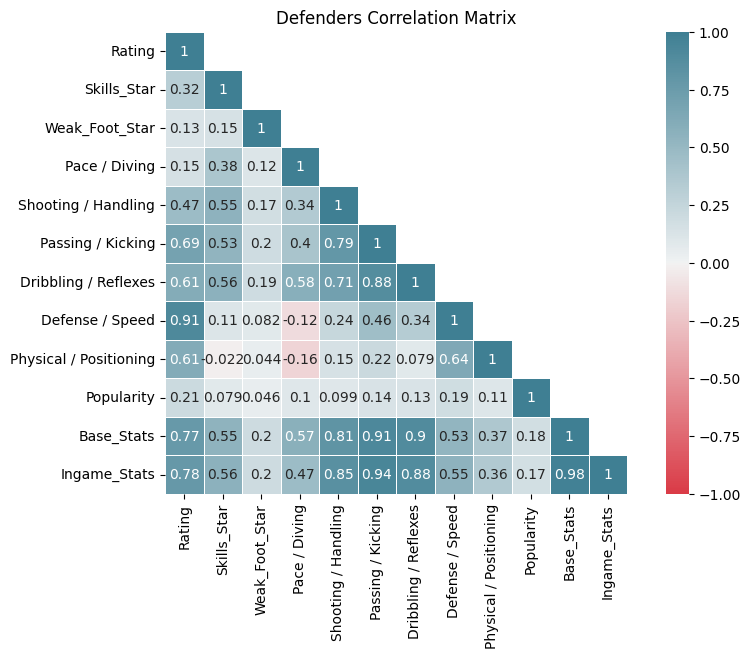

In [534]:
defenders = ['CB', 'LB', 'RB','LWB', 'RWB']

def_df = filtered_df[filtered_df['Main_Position'].isin(defenders)]
corr_matrix = def_df[numeric_columns].corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool)).copy()  

np.fill_diagonal(mask, False) 

cmap = sns.diverging_palette(220, 10, as_cmap=True).reversed()

sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            annot=True, square=True, linewidths=.5) 
plt.title('Defenders Correlation Matrix')
plt.show()

### Attack Correlation Matrix

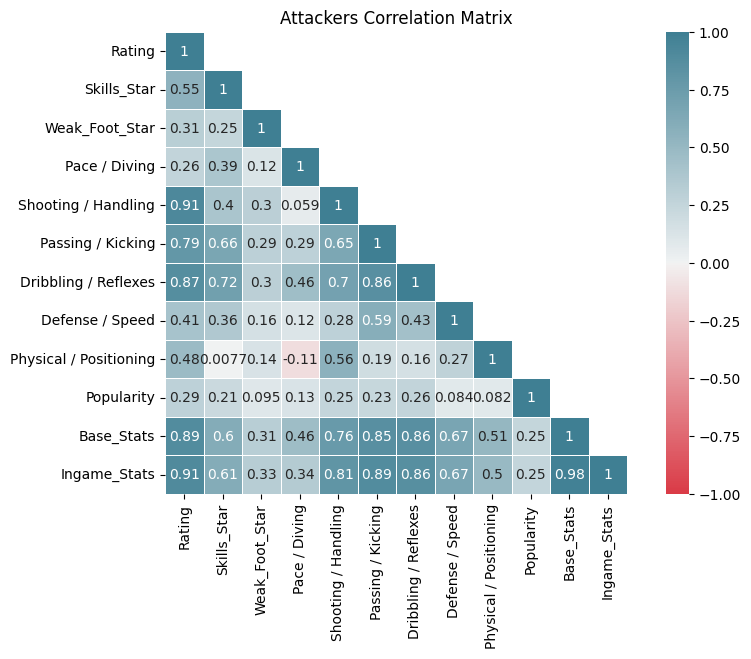

In [535]:
attackers = ['ST','CF','RW','LW']

att_df = filtered_df[filtered_df['Main_Position'].isin(attackers)]
corr_matrix = att_df[numeric_columns].corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool)).copy()  

np.fill_diagonal(mask, False) 

cmap = sns.diverging_palette(220, 10, as_cmap=True).reversed()

sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            annot=True, square=True, linewidths=.5) 
plt.title('Attackers Correlation Matrix')
plt.show()

In [536]:
#| warning : false
#| message : false

filtered_df.drop(['Card_Version', 'Alternate_Positions'], axis= 1, inplace = True)

filtered_df['Weight'] = filtered_df['BodyType'].str.extract(r'\((\d+)kg\)')

filtered_df['Weight'] = filtered_df['Weight'].str.strip()

filtered_df['Weight'] = pd.to_numeric(filtered_df['Weight'])

filtered_df.drop('BodyType', axis = 1, inplace =True)


C:\Users\nickc\AppData\Local\Temp\ipykernel_50168\2097162036.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop(['Card_Version', 'Alternate_Positions'], axis= 1, inplace = True)
C:\Users\nickc\AppData\Local\Temp\ipykernel_50168\2097162036.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Weight'] = filtered_df['BodyType'].str.extract(r'\((\d+)kg\)')
C:\Users\nickc\AppData\Local\Temp\ipykernel_50168\2097162036.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

### Which clubs do quality players tend to play for? 

Quality Players := 80 rating or above

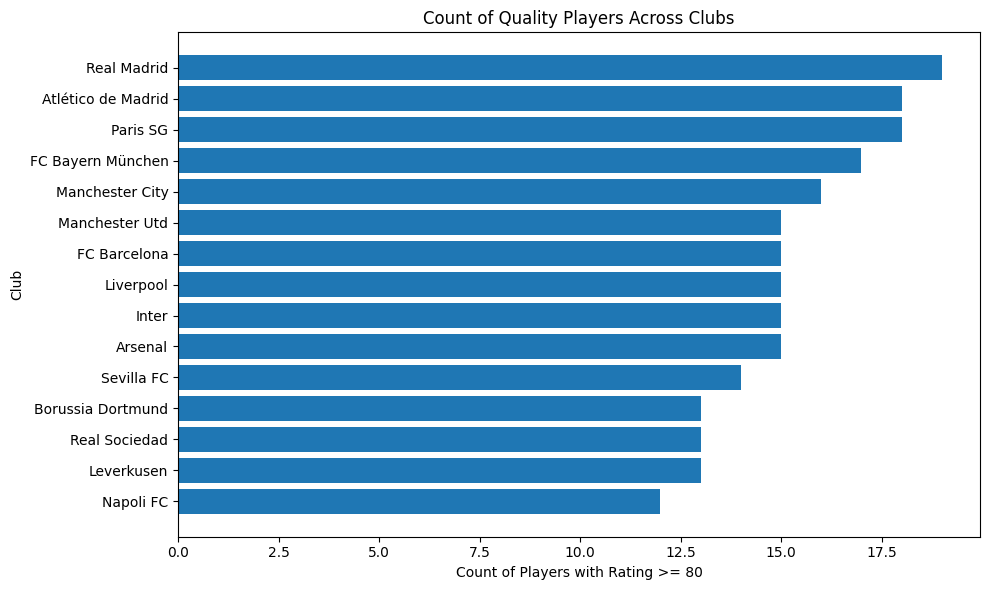

In [537]:
club_counts = filtered_df.query('Rating >= 80').groupby('Club')['Club'].value_counts().sort_values(ascending=False).head(15) 

player_counts = club_counts.values
plt.barh(clubs, player_counts)
plt.ylabel('Club')
plt.xlabel('Count of Players with Rating >= 80')
plt.title('Count of Quality Players Across Clubs')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### What is the average rating of players per club in the Premier League ?

In [538]:
epl = filtered_df.query('League == "Premier League"')

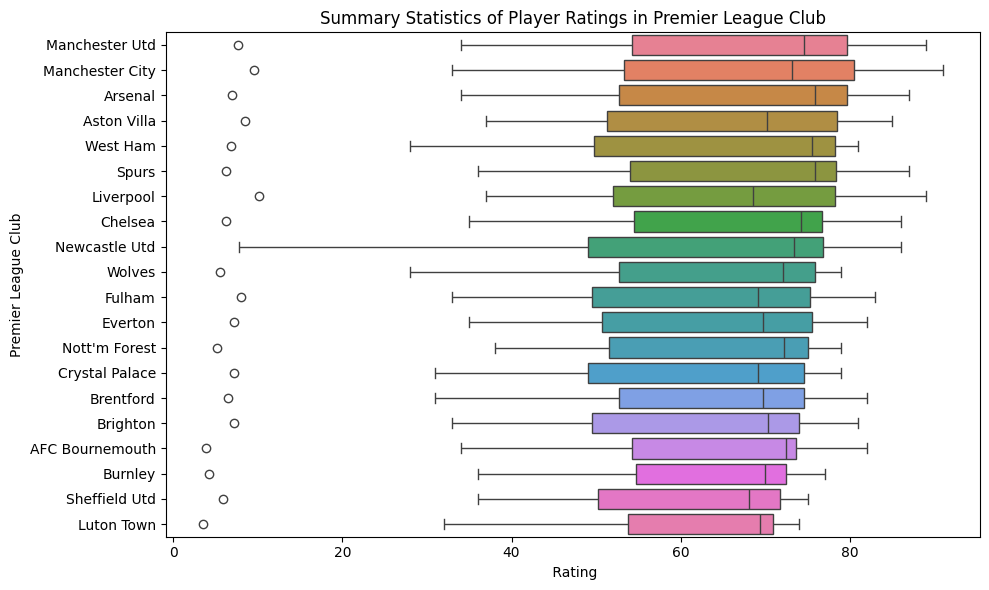

In [539]:
# sort by median since some clubs have more academy kids in the squad than others
club_stats = epl.groupby('Club')['Rating'].describe().sort_values(by='50%',ascending=False).T

sns.boxplot(data=club_stats, orient = 'h')
plt.xlabel(' Rating')  
plt.ylabel('Premier League Club') 
plt.title('Summary Statistics of Player Ratings in Premier League Club')

plt.tight_layout()
plt.show()

Here is the tabular form:

In [540]:
club_stats.T

,count,mean,std,min,25%,50%,75%,max
Club,,,,,,,,
Manchester Utd,34.0,76.705882,7.693088,61.0,72.50,79.0,81.75,89.0
Manchester City,33.0,77.272727,9.500897,60.0,69.00,79.0,85.00,91.0
Arsenal,34.0,77.500000,6.977236,59.0,74.25,78.5,83.00,87.0
Aston Villa,37.0,73.486486,8.510195,56.0,67.00,78.0,80.00,85.0
West Ham,28.0,75.000000,6.798693,57.0,76.00,78.0,79.00,81.0
Spurs,36.0,76.750000,6.280923,60.0,75.00,77.5,81.00,87.0
Liverpool,37.0,73.972973,10.199364,57.0,63.00,77.0,82.00,89.0
Chelsea,35.0,75.485714,6.251454,61.0,73.00,76.0,79.00,86.0
Newcastle Utd,34.0,74.794118,7.756832,54.0,72.00,75.5,81.00,86.0


### Comparative Analysis of Player Quality in the Top 5 Leagues

In [541]:
top_5_leagues = ['Premier League', 'Bundesliga', 'LALIGA EA SPORTS', 'Serie A TIM', 'Ligue 1 Uber Eats']

top_league_players = filtered_df[filtered_df['League'].isin(top_5_leagues)]

In [542]:
# standard deviation of the player rating ins the top 5 leagues
top_league_players.groupby('League')['Rating'].std()

League
Bundesliga           6.531758
LALIGA EA SPORTS     6.373353
Ligue 1 Uber Eats    5.799175
Premier League       7.257025
Serie A TIM          6.123019
Name: Rating, dtype: float64

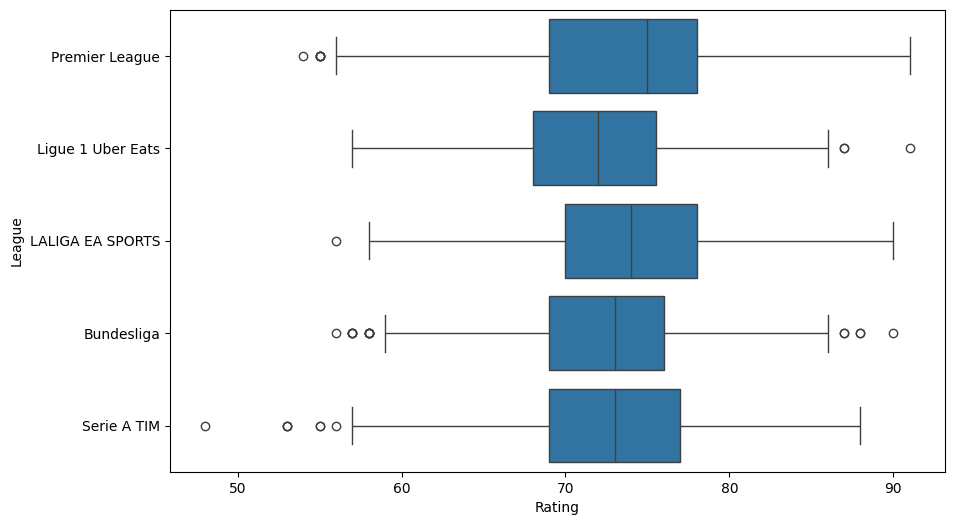

In [543]:
sns.boxplot(x='Rating', y='League', data=top_league_players)
plt.show()

In [544]:
import pingouin as pg

alpha = 0.05

anova_results = pg.anova(data = top_league_players, dv = 'Rating', between = 'League')

anova_results


,Source,ddof1,ddof2,F,p-unc,np2
0,League,4,2989,12.185419,7.922088e-10,0.016045


In [545]:
pairwise_comparisons = pg.pairwise_tests(dv='Rating', between='League', data=top_league_players, padjust='bonf') # use bonferroni correction
pairwise_comparisons

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,League,Bundesliga,LALIGA EA SPORTS,False,True,-4.201515,1152.597854,two-sided,2.856017e-05,2.856017e-04,bonf,377.622,-0.246398
1,League,Bundesliga,Ligue 1 Uber Eats,False,True,2.097641,1095.234972,two-sided,3.616560e-02,3.616560e-01,bonf,0.589,0.125882
2,League,Bundesliga,Premier League,False,True,-2.970311,1227.505373,two-sided,3.032829e-03,3.032829e-02,bonf,4.936,-0.167895
3,League,Bundesliga,Serie A TIM,False,True,-1.373069,1145.902598,two-sided,1.699996e-01,1.000000e+00,bonf,0.166,-0.080417
4,League,LALIGA EA SPORTS,Ligue 1 Uber Eats,False,True,6.588724,1143.874355,two-sided,6.752986e-11,6.752986e-10,bonf,9.318e+07,0.387622
5,League,LALIGA EA SPORTS,Premier League,False,True,1.114536,1275.635004,two-sided,2.652593e-01,1.000000e+00,bonf,0.116,0.061963
6,League,LALIGA EA SPORTS,Serie A TIM,False,True,3.014726,1208.575789,two-sided,2.625758e-03,2.625758e-02,bonf,5.648,0.172991
7,League,Ligue 1 Uber Eats,Premier League,False,True,-5.196920,1215.949762,two-sided,2.374437e-07,2.374437e-06,bonf,3.514e+04,-0.292320
8,League,Ligue 1 Uber Eats,Serie A TIM,False,True,-3.666813,1147.330845,two-sided,2.568395e-04,2.568395e-03,bonf,48.729,-0.215426
9,League,Premier League,Serie A TIM,False,True,1.758884,1277.779036,two-sided,7.883654e-02,7.883654e-01,bonf,0.289,0.097340


## Linear Regression

In [546]:
filtered_df =filtered_df.drop(['Height', 'Popularity', 'Base_Stats',
       'Ingame_Stats', 'Weight'],axis =1)

In [547]:
from sklearn.preprocessing import OneHotEncoder


columns_to_encode = ['Run_Style', 'Attack_Workrate', 'Defense_Workrate']
encoder = OneHotEncoder(handle_unknown='ignore')
encoded_data = encoder.fit_transform(filtered_df[columns_to_encode])
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(columns_to_encode)) 

df2 = filtered_df.drop(columns_to_encode, axis=1).join(encoded_df)
df2.dropna(inplace=True)

In [548]:
X = df2.iloc[:, 6:]
y = df2['Rating']

In [549]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1998, shuffle = True)

In [550]:
lm = LinearRegression()
lm.fit(X_train, y_train)

pred = lm.predict(X_test)

In [551]:
def evaluate_model(y_test, y_pred):
    metrics = {'Metric': ['MSE', 'RMSE', 'MAE', 'MAPE'],
               'Value': [mean_squared_error(y_test, y_pred),
                         mean_squared_error(y_test, y_pred) ** 0.5,
                         mean_absolute_error(y_test, y_pred),
                         mean_absolute_percentage_error(y_test, y_pred) * 100]
              }

    results_df = pd.DataFrame(metrics)
    print(results_df)

In [552]:
evaluate_model(y_test, pred)

  Metric     Value
0    MSE  9.368738
1   RMSE  3.060839
2    MAE  2.423679
3   MAPE  3.581369


## Classification

In [553]:
X_clf = X.iloc[:, 2:8]
y_clf = df2['Main_Position']

In [554]:
from sklearn.ensemble import RandomForestClassifier

X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(X_clf, y_clf, test_size = 0.2, random_state=1998, shuffle=True)


In [555]:
rf_model = RandomForestClassifier(n_estimators=150, random_state=1998)

rf_model.fit(X_clf_train,y_clf_train)

clf_pred = rf_model.predict(X_clf_test)

In [556]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_clf_test, clf_pred)

print(f'Accuracy Score: {accuracy}')


Accuracy Score: 0.6441484300666033


# NBA Players Data

In [557]:
kaggle.api.dataset_download_files('justinas/nba-players-data', path='./', unzip=True)

In [558]:
nba = pd.read_csv('all_seasons.csv')
nba

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,42,64,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,34,4,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,12,41,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,7,64,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,22,52,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12839,12839,Joel Embiid,PHI,29.0,213.36,127.005760,Kansas,Cameroon,2014,1,3,66,33.1,10.2,4.2,8.8,0.057,0.243,0.370,0.655,0.233,2022-23
12840,12840,John Butler Jr.,POR,20.0,213.36,86.182480,Florida State,USA,Undrafted,Undrafted,Undrafted,19,2.4,0.9,0.6,-16.1,0.012,0.065,0.102,0.411,0.066,2022-23
12841,12841,John Collins,ATL,25.0,205.74,102.511792,Wake Forest,USA,2017,1,19,71,13.1,6.5,1.2,-0.2,0.035,0.180,0.168,0.593,0.052,2022-23
12842,12842,Jericho Sims,NYK,24.0,208.28,113.398000,Texas,USA,2021,2,58,52,3.4,4.7,0.5,-6.7,0.117,0.175,0.074,0.780,0.044,2022-23


In [559]:
show_summary(nba)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
DIMENSIONS : (12844, 22)
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
COLUMNS: 
['Unnamed: 0' 'player_name' 'team_abbreviation' 'age' 'player_height'
 'player_weight' 'college' 'country' 'draft_year' 'draft_round'
 'draft_number' 'gp' 'pts' 'reb' 'ast' 'net_rating' 'oreb_pct' 'dreb_pct'
 'usg_pct' 'ts_pct' 'ast_pct' 'season']
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
DATA INFO: 
Unnamed: 0             int64
player_name           object
team_abbreviation     object
age                  float64
player_height        float64
player_weight        float64
college               object
country               object
draft_year            object
draft_round           object
draft_number          object
gp                     int64
pts                  float64
reb                  float64
ast                  float64
net_rating           float6

## Distribution of NBA Players Statistics

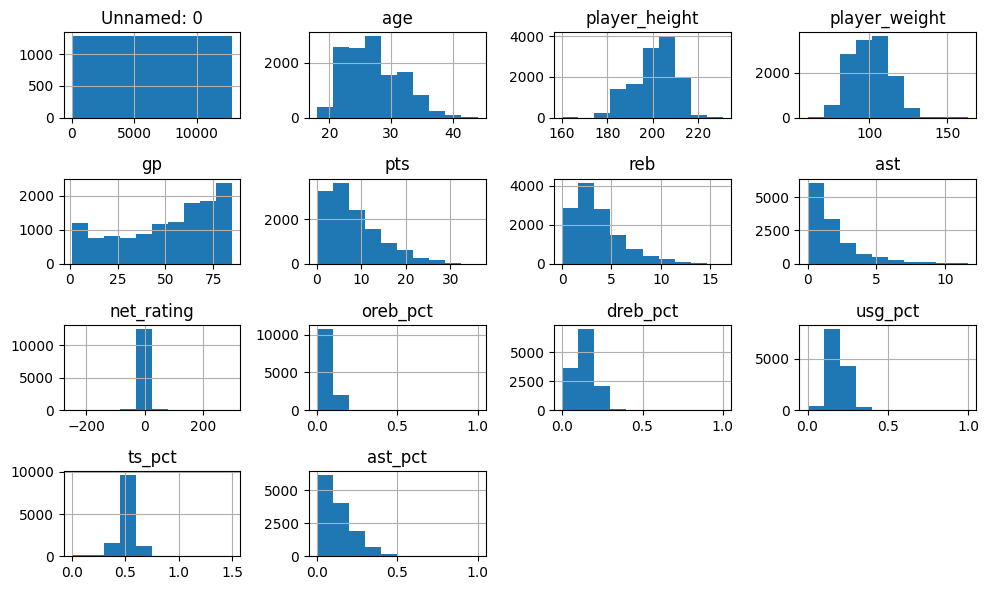

In [560]:
nba.hist()
plt.tight_layout()
plt.show()

## Player Height v Weight

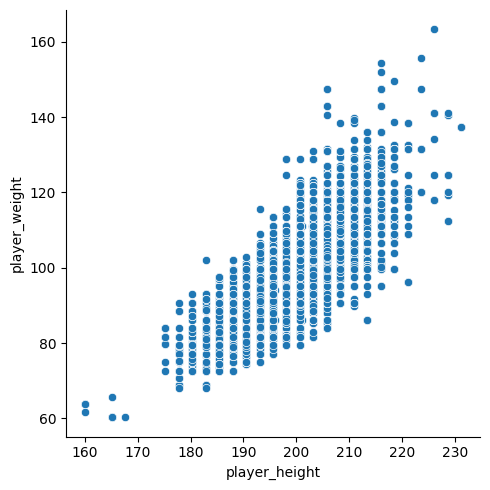

In [561]:
sns.relplot(x =nba['player_height'], y = nba['player_weight'], kind = 'scatter')
plt.show()

## Which colleges produce the most NBA players?

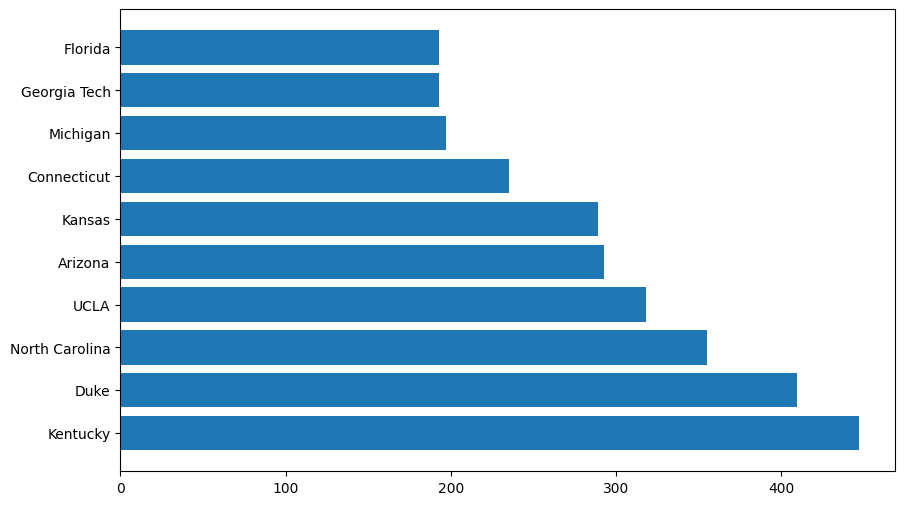

In [563]:
nba_college_count = nba.groupby('college')['college'].value_counts().sort_values(ascending=False).head(10)

colleges = nba_college_count.index.get_level_values(0).to_list()
counts = nba_college_count.values

plt.barh(colleges, counts) 
plt.show()

In [567]:
nba = nba.iloc[:, 1:]

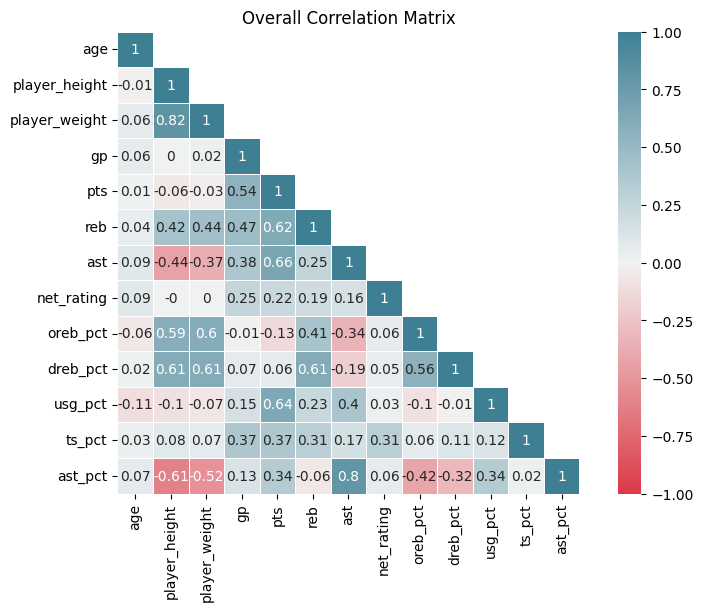

In [570]:
numerics = nba.select_dtypes(include=np.number)
corr_matrix = numerics.corr()
corr_matrix = corr_matrix.round(2)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool)).copy()  

np.fill_diagonal(mask, False) 

cmap = sns.diverging_palette(220, 10, as_cmap=True).reversed()

sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            annot=True, square=True, linewidths=.5) 
plt.title('Overall Correlation Matrix')

plt.show()

## Regression 

In [576]:
# predict the average points 

X = numerics.drop('pts', axis = 1)

In [577]:
y = numerics['pts']

In [579]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1998, shuffle=True)

In [580]:
model = LinearRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)

In [581]:
evaluate_model(y_test, pred)

  Metric         Value
0    MSE  4.909276e+00
1   RMSE  2.215689e+00
2    MAE  1.419333e+00
3   MAPE  3.647905e+16


In [586]:
# KKN approach

from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors = 5)
knn_model.fit(X_train, y_train) 

KNeighborsRegressor()

In [585]:
knn_pred = knn_model.predict(X_test)

evaluate_model(y_test, knn_pred)

  Metric         Value
0    MSE  1.690545e+01
1   RMSE  4.111624e+00
2    MAE  2.973939e+00
3   MAPE  1.250221e+16
